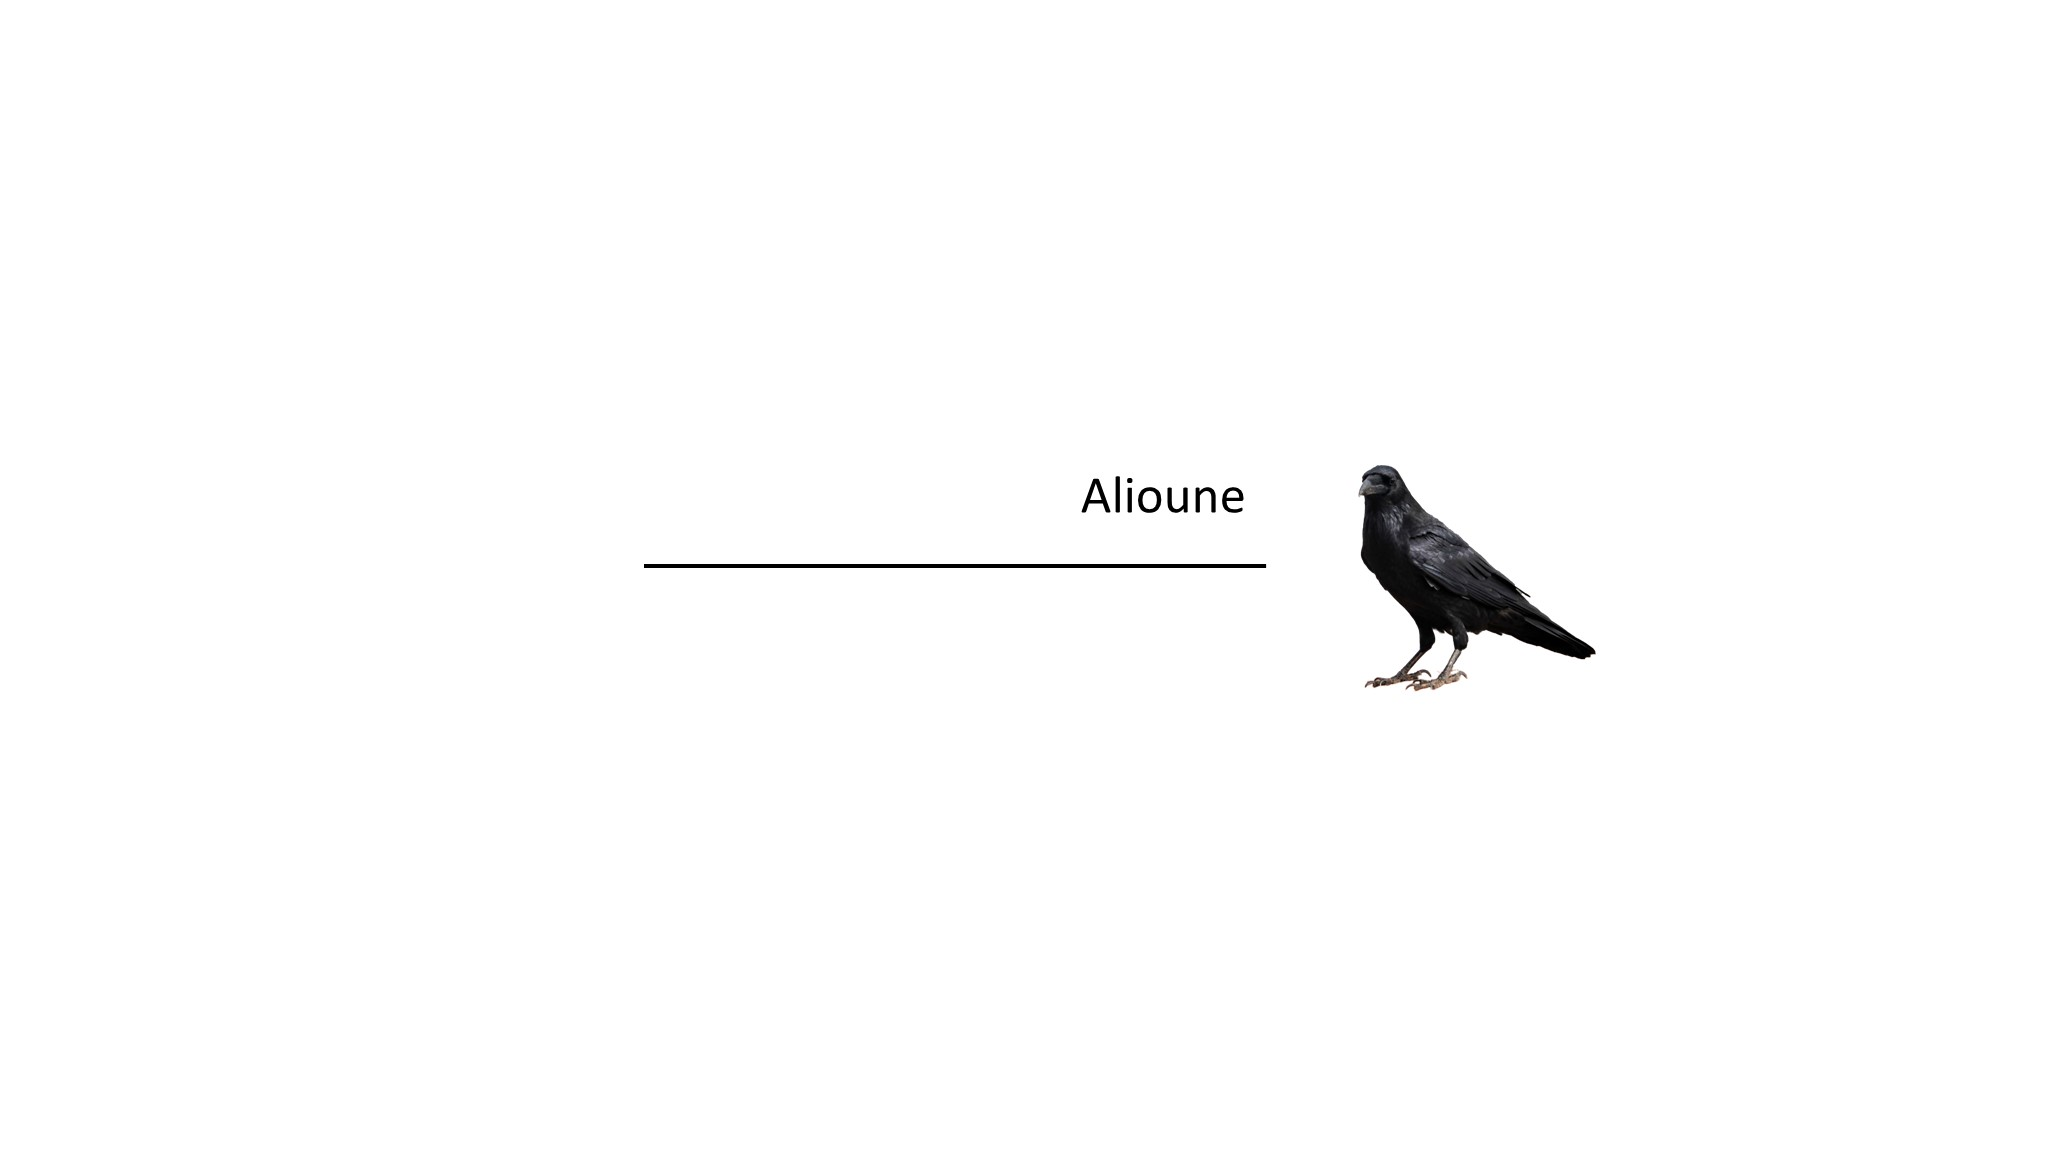

# Purpose of Notebook: Data Prep for Sankey Diagram (Notebook 2 of 4)
# <u>[Data Science Nigeria Challenge #1: Loan Default Prediction](https://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction/data)</u>

I think it is good practice to use a Sankey diagram as a tool to understand the data you are using to process ML and AI algorithms, in my opinion. To create a Sankey diagram using the Plotly library. Data has to be structured in a particular manner to achieve the goal. The purpose of this notebook is to prepare the data thereof.

<u>Prerequisites</u>:
* Install [Mito](https://docs.trymito.io/getting-started/installing-mito)

<u>Credits</u>: [Bhavesh Bhatt](https://github.com/bhattbhavesh91) [[Notebook](https://github.com/bhattbhavesh91/sankey-diagram-plotly-tutorial/blob/main/sankey-diagram-notebook.ipynb)]

In [1]:
import pandas as pd

In [2]:
clean = pd.read_csv('clean.csv')
clean.head()

,loanamount,totaldue,termdays,referred,good_bad_flag,age_as_at_2017,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,systemloanid,loannumber_trainprevloans,loanamount_trainprevloans,totaldue_trainprevloans,termdays_trainprevloans,closeddate_days,firstduedate_days,firstrepaiddate_days
0,30000.0,34500.0,30,Yes,Good,45,Other,3.432010,6.433055,Diamond Bank,Permanent,301682320.0,2.0,10000.0,13000.0,30,17,30,17
1,20000.0,22250.0,15,Yes,Good,33,Other,11.139350,10.292041,EcoBank,Permanent,301861541.0,5.0,10000.0,11500.0,15,15,15,15
2,10000.0,11500.0,15,Yes,Good,40,Savings,3.985770,7.491708,First Bank,Permanent,301941754.0,2.0,10000.0,11500.0,15,27,16,27
3,40000.0,44000.0,30,Yes,Good,31,Other,7.457913,9.076574,GT Bank,Permanent,301832407.0,5.0,20000.0,23800.0,30,29,30,29
4,10000.0,13000.0,30,Yes,Good,28,Savings,3.259444,6.557011,GT Bank,Permanent,301936857.0,2.0,10000.0,13000.0,30,27,30,27


In [3]:
import mitosheet
mitosheet.sheet(clean, analysis_to_replay="id-klxbnpkoxb")

MitoWidget(analysis_data_json='{"analysisName": "id-njcazqcxxk", "analysisToReplay": {"analysisName": "id-klxb…

In [4]:
from mitosheet import *; register_analysis("id-klxbnpkoxb");
    
# Changed termdays to dtype str
clean['termdays'] = clean['termdays'].astype('str')

# Deleted columns longitude_gps, latitude_gps
clean.drop(['longitude_gps', 'latitude_gps'], axis=1, inplace=True)

# Deleted columns totaldue
clean.drop(['totaldue'], axis=1, inplace=True)

# Deleted columns systemloanid
clean.drop(['systemloanid'], axis=1, inplace=True)

# Changed loannumber_trainprevloans to dtype str
clean['loannumber_trainprevloans'] = clean['loannumber_trainprevloans'].astype('str')

# Added column new-column-fx2w
clean.insert(13, 'new-column-fx2w', 0)

# Renamed columns record_time
clean.rename(columns={'new-column-fx2w': 'record_time'}, inplace=True)

# Set formula of record_time
clean['record_time'] = IF(clean['closeddate_days']<=clean['termdays_trainprevloans'],'Yes','No')

# Added column new-column-36lz
clean.insert(14, 'new-column-36lz', 0)

# Renamed columns behind
clean.rename(columns={'new-column-36lz': 'behind'}, inplace=True)

# Set formula of behind
clean['behind'] = IF(clean['termdays_trainprevloans']-clean['closeddate_days']>0,0,clean['closeddate_days']-clean['termdays_trainprevloans'])

# Deleted columns firstrepaiddate_days
clean.drop(['firstrepaiddate_days'], axis=1, inplace=True)


C:\Users\Ali\anaconda3\envs\envDtale\lib\site-packages\mitosheet\sheet_functions\control_functions.py:138: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  data=[true_series.loc[i] if c else false_series.loc[i] for i, c in condition.iteritems()],
C:\Users\Ali\anaconda3\envs\envDtale\lib\site-packages\mitosheet\sheet_functions\control_functions.py:138: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  data=[true_series.loc[i] if c else false_series.loc[i] for i, c in condition.iteritems()],


In [5]:
# clean['loanamount'] = pd.cut(x=clean['loanamount'],bins=[0,10000,20000,30000,60000],labels=['Small','Medium','Large'])
# loanamount = pd.get_dummies(df['loanamount'])
# clean = clean.join(loanamount).drop('loanamount', axis=1)

clean['age_as_at_2017'] = pd.cut(x=clean['age_as_at_2017'],bins=[0,20,39,56],labels=['Youth','Young_adults','Adults'])
# age_as_at_2017 = pd.get_dummies(df['age_as_at_2017'])
# clean = clean.join(age_as_at_2017).drop('age_as_at_2017', axis=1)

clean['loanamount_trainprevloans'] = pd.cut(x=clean['loanamount_trainprevloans'],bins=[0,10000,20000,50000],labels=['Small','Medium','Large'])
# # loanamount_trainprevloans = pd.get_dummies(df['loanamount_trainprevloans'])
# clean = clean.join(loanamount_trainprevloans).drop('loanamount_trainprevloans', axis=1)

clean['totaldue_trainprevloans'] = pd.cut(x=clean['totaldue_trainprevloans'],bins=[0,11600,23810,60000],labels=['Small','Medium','Large'])
# # totaldue_trainprevloans = pd.get_dummies(df['totaldue_trainprevloans'])
# clean = clean.join(totaldue_trainprevloans).drop('totaldue_trainprevloans', axis=1)

In [6]:
clean.head()

,loanamount,termdays,referred,good_bad_flag,age_as_at_2017,bank_account_type,bank_name_clients,employment_status_clients,loannumber_trainprevloans,loanamount_trainprevloans,totaldue_trainprevloans,termdays_trainprevloans,closeddate_days,record_time,behind,firstduedate_days
0,30000.0,30,Yes,Good,Adults,Other,Diamond Bank,Permanent,2.0,Small,Medium,30,17,Yes,0,30
1,20000.0,15,Yes,Good,Young_adults,Other,EcoBank,Permanent,5.0,Small,Small,15,15,Yes,0,15
2,10000.0,15,Yes,Good,Adults,Savings,First Bank,Permanent,2.0,Small,Small,15,27,No,12,16
3,40000.0,30,Yes,Good,Young_adults,Other,GT Bank,Permanent,5.0,Medium,Medium,30,29,Yes,0,30
4,10000.0,30,Yes,Good,Young_adults,Savings,GT Bank,Permanent,2.0,Small,Medium,30,27,Yes,0,30


In [7]:
import mitosheet
mitosheet.sheet(clean, analysis_to_replay="id-cahwathrbs")

MitoWidget(analysis_data_json='{"analysisName": "id-wcsofsfqqh", "analysisToReplay": {"analysisName": "id-cahw…

In [8]:
from mitosheet import *; register_analysis("id-cahwathrbs");
    
# Deleted columns referred
clean.drop(['referred'], axis=1, inplace=True)

# Pivoted into clean
tmp_df = clean[['loanamount', 'good_bad_flag']]
pivot_table = tmp_df.pivot_table(
    index=['loanamount'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
clean_pivot = pivot_table.reset_index()

# Changed loanamount to dtype str
clean_pivot['loanamount'] = clean_pivot['loanamount'].astype('str')

# Changed loanamount to dtype int
clean_pivot['loanamount'] = to_int_series(clean_pivot['loanamount'])

# Changed loanamount to dtype str
clean_pivot['loanamount'] = clean_pivot['loanamount'].astype('str')

# Pivoted into clean
tmp_df = clean[['termdays', 'loanamount', 'bank_account_type', 'good_bad_flag', 'bank_name_clients']]
pivot_table = tmp_df.pivot_table(
    index=['bank_name_clients', 'bank_account_type', 'loanamount', 'termdays'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
clean_pivot = pivot_table.reset_index()

# Renamed clean_pivot to links_a
links_a = clean_pivot

# Deleted columns termdays
links_a.drop(['termdays'], axis=1, inplace=True)

# Deleted columns loanamount
links_a.drop(['loanamount'], axis=1, inplace=True)

# Renamed links_a to bank_name_acc
bank_name_acc = links_a

# Renamed columns source
bank_name_acc.rename(columns={'bank_name_clients': 'source'}, inplace=True)

# Renamed columns target
bank_name_acc.rename(columns={'bank_account_type': 'target'}, inplace=True)

# Renamed columns value
bank_name_acc.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Pivoted into clean
tmp_df = clean[['loanamount', 'termdays', 'good_bad_flag']]
pivot_table = tmp_df.pivot_table(
    index=['loanamount', 'termdays'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
clean_pivot = pivot_table.reset_index()

# Renamed clean_pivot to amt_terms
amt_terms = clean_pivot

# Changed loanamount to dtype str
amt_terms['loanamount'] = amt_terms['loanamount'].astype('str')

# Changed loanamount to dtype int
amt_terms['loanamount'] = to_int_series(amt_terms['loanamount'])

# Changed loanamount to dtype str
amt_terms['loanamount'] = amt_terms['loanamount'].astype('str')

# Renamed columns source
amt_terms.rename(columns={'loanamount': 'source'}, inplace=True)

# Renamed columns target
amt_terms.rename(columns={'termdays': 'target'}, inplace=True)

# Renamed columns value
amt_terms.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Pivoted into clean
tmp_df = clean[['bank_account_type', 'good_bad_flag', 'bank_name_clients']]
pivot_table = tmp_df.pivot_table(
    index=['bank_name_clients', 'bank_account_type'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
bank_name_acc = pivot_table.reset_index()

# Renamed columns source
bank_name_acc.rename(columns={'bank_name_clients': 'source'}, inplace=True)

# Renamed columns target
bank_name_acc.rename(columns={'bank_account_type': 'target'}, inplace=True)

# Renamed columns value
bank_name_acc.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Pivoted into clean
tmp_df = clean[['loanamount', 'bank_account_type', 'good_bad_flag']]
pivot_table = tmp_df.pivot_table(
    index=['bank_account_type', 'loanamount'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
clean_pivot = pivot_table.reset_index()

# Renamed clean_pivot to acc_amt
acc_amt = clean_pivot

# Renamed acc_amt to 2_acc_amt
df_2_acc_amt = acc_amt

# Renamed df_2_acc_amt to 2_acc_amt
df_2_acc_amt = df_2_acc_amt

# Renamed bank_name_acc to bank_name_acc_1
bank_name_acc_1 = bank_name_acc

# Renamed df_2_acc_amt to acc_amt_2
acc_amt_2 = df_2_acc_amt

# Renamed columns source
acc_amt_2.rename(columns={'bank_account_type': 'source'}, inplace=True)

# Renamed columns target
acc_amt_2.rename(columns={'loanamount': 'target'}, inplace=True)

# Renamed columns value
acc_amt_2.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Changed target to dtype int
acc_amt_2['target'] = acc_amt_2['target'].fillna(0).astype('int')

# Changed target to dtype str
acc_amt_2['target'] = acc_amt_2['target'].astype('str')

# Pivoted into clean
tmp_df = clean[['loanamount', 'termdays', 'good_bad_flag']]
pivot_table = tmp_df.pivot_table(
    index=['loanamount', 'termdays'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
clean_pivot = pivot_table.reset_index()

# Renamed clean_pivot to amt_term_3
amt_term_3 = clean_pivot

# Changed loanamount to dtype int
amt_term_3['loanamount'] = amt_term_3['loanamount'].fillna(0).astype('int')

# Changed loanamount to dtype str
amt_term_3['loanamount'] = amt_term_3['loanamount'].astype('str')

# Renamed columns source
amt_term_3.rename(columns={'loanamount': 'source'}, inplace=True)

# Renamed columns target
amt_term_3.rename(columns={'termdays': 'target'}, inplace=True)

# Renamed columns value
amt_term_3.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Pivoted into clean
tmp_df = clean[['bank_account_type', 'good_bad_flag', 'loanamount_trainprevloans']]
pivot_table = tmp_df.pivot_table(
    index=['bank_account_type', 'loanamount_trainprevloans'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
acc_amt_2 = pivot_table.reset_index()

# Renamed columns source
acc_amt_2.rename(columns={'bank_account_type': 'source'}, inplace=True)

# Renamed columns target
acc_amt_2.rename(columns={'loanamount_trainprevloans': 'target'}, inplace=True)

# Renamed columns value
acc_amt_2.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Pivoted into clean
tmp_df = clean[['loanamount_trainprevloans', 'termdays_trainprevloans', 'good_bad_flag']]
pivot_table = tmp_df.pivot_table(
    index=['loanamount_trainprevloans', 'termdays_trainprevloans'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
amt_term_3 = pivot_table.reset_index()

# Changed termdays_trainprevloans to dtype str
amt_term_3['termdays_trainprevloans'] = amt_term_3['termdays_trainprevloans'].astype('str')

# Renamed columns source
amt_term_3.rename(columns={'loanamount_trainprevloans': 'source'}, inplace=True)

# Renamed columns target
amt_term_3.rename(columns={'termdays_trainprevloans': 'target'}, inplace=True)

# Renamed columns value
amt_term_3.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Pivoted into clean
tmp_df = clean[['loanamount_trainprevloans', 'good_bad_flag', 'totaldue_trainprevloans']]
pivot_table = tmp_df.pivot_table(
    index=['loanamount_trainprevloans', 'totaldue_trainprevloans'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
amt_term_3 = pivot_table.reset_index()

# Renamed columns source
amt_term_3.rename(columns={'loanamount_trainprevloans': 'source'}, inplace=True)

# Renamed columns target
amt_term_3.rename(columns={'totaldue_trainprevloans': 'target'}, inplace=True)

# Renamed columns value
amt_term_3.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Renamed amt_term_3 to amt_due_3
amt_due_3 = amt_term_3

# Pivoted into clean
tmp_df = clean[['good_bad_flag', 'record_time', 'totaldue_trainprevloans']]
pivot_table = tmp_df.pivot_table(
    index=['totaldue_trainprevloans', 'record_time'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
clean_pivot = pivot_table.reset_index()

# Renamed clean_pivot to due_recd_time_4
due_recd_time_4 = clean_pivot

# Renamed columns source
due_recd_time_4.rename(columns={'totaldue_trainprevloans': 'source'}, inplace=True)

# Renamed columns target
due_recd_time_4.rename(columns={'record_time': 'target'}, inplace=True)

# Renamed columns value
due_recd_time_4.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Pivoted into clean
tmp_df = clean[['employment_status_clients', 'record_time', 'good_bad_flag']]
pivot_table = tmp_df.pivot_table(
    index=['record_time', 'employment_status_clients'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
clean_pivot = pivot_table.reset_index()

# Renamed clean_pivot to recd_time_empstatus_5
recd_time_empstatus_5 = clean_pivot

# Renamed columns source
recd_time_empstatus_5.rename(columns={'record_time': 'source'}, inplace=True)

# Renamed columns target
recd_time_empstatus_5.rename(columns={'employment_status_clients': 'target'}, inplace=True)

# Renamed columns value
recd_time_empstatus_5.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Pivoted into clean
clean_pivot = pd.DataFrame(data={})

# Pivoted into clean
tmp_df = clean[['age_as_at_2017', 'employment_status_clients', 'good_bad_flag']]
pivot_table = tmp_df.pivot_table(
    index=['employment_status_clients', 'age_as_at_2017'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
clean_pivot = pivot_table.reset_index()

# Renamed clean_pivot to empstatus_age_6
empstatus_age_6 = clean_pivot

# Renamed columns source
empstatus_age_6.rename(columns={'employment_status_clients': 'source'}, inplace=True)

# Renamed columns target
empstatus_age_6.rename(columns={'age_as_at_2017': 'target'}, inplace=True)

# Renamed columns value
empstatus_age_6.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Pivoted into clean
tmp_df = clean[['age_as_at_2017', 'good_bad_flag']]
pivot_table = tmp_df.pivot_table(
    index=['age_as_at_2017', 'good_bad_flag'],
    values=['good_bad_flag'],
    aggfunc={'good_bad_flag': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
clean_pivot = pivot_table.reset_index()

# Renamed clean_pivot to age_flag_7
age_flag_7 = clean_pivot

# Renamed columns source
age_flag_7.rename(columns={'age_as_at_2017': 'source'}, inplace=True)

# Renamed columns target
age_flag_7.rename(columns={'good_bad_flag': 'target'}, inplace=True)

# Renamed columns value
age_flag_7.rename(columns={'good_bad_flag count': 'value'}, inplace=True)

# Concatenated 0 into dataframes into df9
df9 = pd.DataFrame()

# Concatenated 6 into dataframes into df10
df10 = pd.concat([acc_amt_2, amt_due_3, due_recd_time_4, recd_time_empstatus_5, empstatus_age_6, age_flag_7], join='inner', ignore_index=True)

# Renamed df10 to links
links = df10

# Set formula of target
acc_amt_2['target'] = IF(acc_amt_2['target']=='Small','Amt: Small',IF(acc_amt_2['target']=='Medium','Amt: Medium','Amt: Large'))

# Set formula of source
amt_due_3['source'] = IF(amt_due_3['source']=='Small', 'Amt: Small',IF(amt_due_3['source']=='Medium', 'Amt: Medium','Amt: Large'))

# Set formula of target
amt_due_3['target'] = IF(amt_due_3['target']=='Small','Due: Small',IF(amt_due_3['target']=='Medium','Due: Medium','Due: Large'))

# Set formula of source
due_recd_time_4['source'] = IF(due_recd_time_4['source']=='Small','Due: Small',IF(due_recd_time_4['source']=='Medium','Due: Medium','Due: Large'))

# Concatenated 6 into dataframes into df9
df9 = pd.concat([acc_amt_2, amt_due_3, due_recd_time_4, recd_time_empstatus_5, empstatus_age_6, age_flag_7], join='inner', ignore_index=True)

# Renamed df9 to links
links = df9

# Set formula of source
recd_time_empstatus_5['source'] = IF(recd_time_empstatus_5['source']=='Yes', 'Record Time: Yes', 'Record Time: No')

# Set formula of target
due_recd_time_4['target'] = IF(due_recd_time_4['target']=='Yes', 'Record Time: Yes', 'Record Time: No')

# Concatenated 7 into dataframes into df9
df9 = pd.concat([bank_name_acc_1, acc_amt_2, amt_due_3, due_recd_time_4, recd_time_empstatus_5, empstatus_age_6, age_flag_7], join='inner', ignore_index=True)

# Renamed df9 to links
links = df9

# Duplicated clean
clean_copy = clean.copy(deep=True)

# Renamed clean_copy to clean_for_class
clean_for_class = clean_copy

# Set formula of loanamount_trainprevloans
clean_for_class['loanamount_trainprevloans'] = IF(clean_for_class['loanamount_trainprevloans']=='Small','Amt_Small',IF(clean_for_class['loanamount_trainprevloans']=='Medium','Amt_Medium','Amt_Large'))

# Set formula of totaldue_trainprevloans
clean_for_class['totaldue_trainprevloans'] = IF(clean_for_class['totaldue_trainprevloans']=='Small','Due_Small',IF(clean_for_class['totaldue_trainprevloans']=='Medium','Due_Medium','Due_Large'))

# Deleted columns bank_name_clients
clean_for_class.drop(['bank_name_clients'], axis=1, inplace=True)


C:\Users\Ali\AppData\Local\Temp\ipykernel_13172\3502616798.py:13: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_13172\3502616798.py:32: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_13172\3502616798.py:63: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
C:\Users\Ali\App